# Perceptron Algorithm

### Linear Boundaries
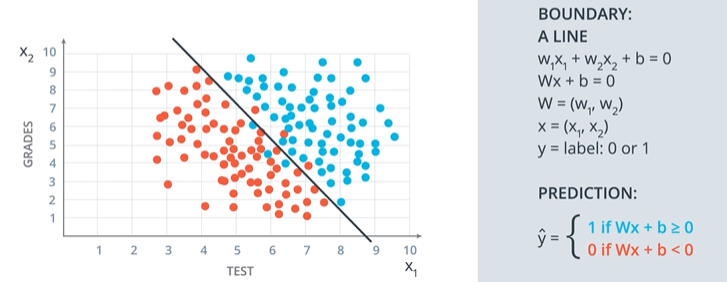

### Higher Dimensions
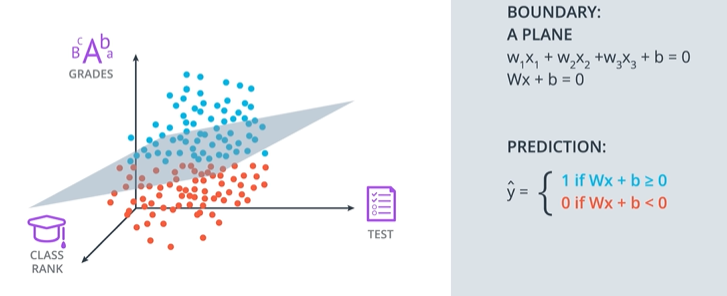

**QUIZ QUESTION**  <br>
Given the table in the video above, what would the dimensions be for input features `(x)`, the weights `(W)`, and the bias `(b)` to satisfy `(Wx + b)`? <br>
**Ans** `W:(1*n),x:(n*1),b:(1*1)`

### Perceptrons

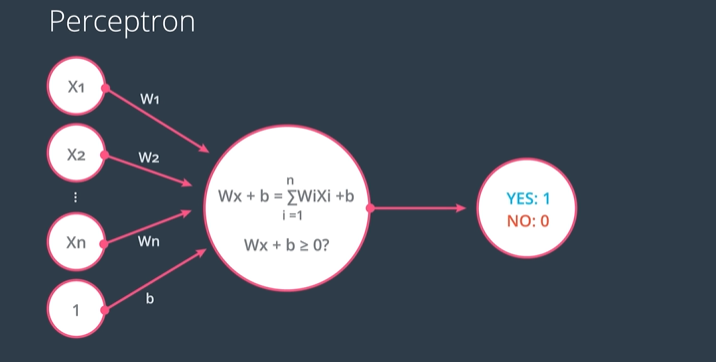

### What are the weights and bias for the AND perceptron?
Set the weights (`weight1`, `weight2`) and bias (`bias`) to values that will correctly determine the AND.

In [1]:
import pandas as pd

# Set weight1, weight2, and bias
weight1 = 25
weight2 = 175
bias = -200


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -200                    0          Yes
       0          1                   -25                    0          Yes
       1          0                  -175                    0          Yes
       1          1                     0                    1          Yes


#### Two ways to go from an AND perceptron to an OR perceptron are :
 - Increase the weights
 - Decrease the magnitude of the bias

### NOT Perceptron

In [5]:
import pandas as pd

# Set weight1, weight2, and bias

weight1 = 10
weight2 = -100
bias = 10


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                    10                    1          Yes
       0          1                   -90                    0          Yes
       1          0                    20                    1          Yes
       1          1                   -80                    0          Yes


## Perceptron Trick
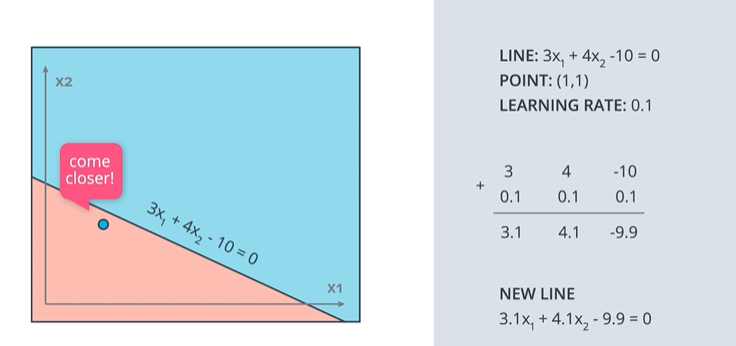

## Coding the Perceptron Algorithm
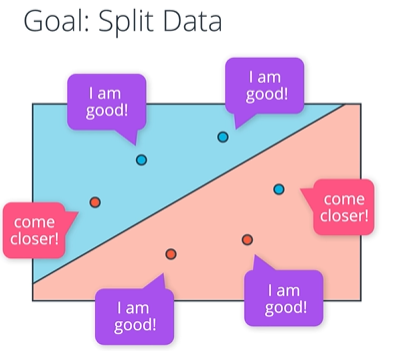

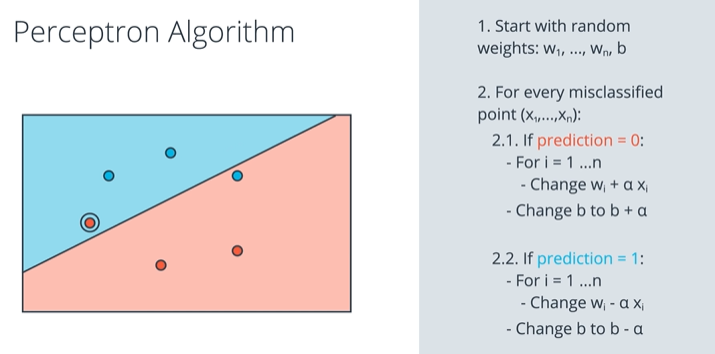

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15, 9)

# Setting the random seed
np.random.seed(42)

In [7]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [8]:
# The function should receive as inputs the data X, the labels y, the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm, and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [9]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations, for plotting purposes.


def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

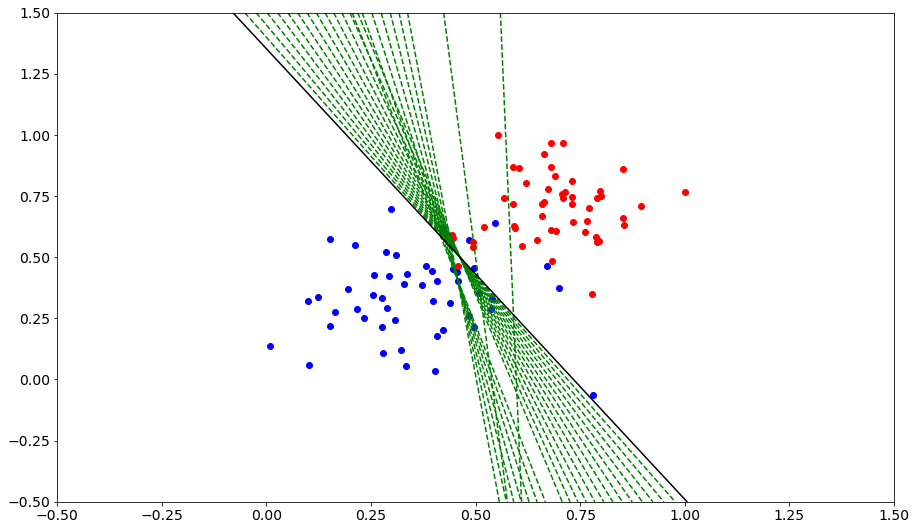

In [11]:
df = pd.read_csv('datasets/perceptron_algorithm.csv', header=None)
X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1:])

np.random.seed(42)

fig = plt.figure()
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
pos = df[df.iloc[:,-1] > 0].iloc[:,:-1]
plt.scatter(pos.iloc[:,0], pos.iloc[:,1], color='blue')
neg = df[df.iloc[:,-1] <= 0].iloc[:,:-1]
plt.scatter(neg.iloc[:,0], neg.iloc[:,1], color='red')
boundary_lines = trainPerceptronAlgorithm(X,y)

for i, (a,b) in enumerate(boundary_lines):
    y_0 = 1.5
    x_0 = (y_0 - b) / a
    y_1 = -0.5
    x_1 = (y_1 - b) / a
    if i != len(boundary_lines) - 1:
        plt.plot([x_0,x_1], [y_0,y_1], linestyle='dashed', color='green')
    else:
        plt.plot([x_0,x_1], [y_0,y_1], color='black')
plt.show()